In [29]:
import numpy as np
from matplotlib import pyplot as plt
import csv
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.linear_model import HuberRegressor

plt.style.use("ggplot")

In [30]:
def load_dataset_csv(data_path):
    """Reads from a csv file assuming two columns (2D) representing X and y
    of a regression problem."""
    with open(data_path, newline='') as f:
        csv_reader = csv.reader(f)    

        next(csv_reader)

        X = []
        y = []

        for row in csv_reader:
            X.append(row[0])
            y.append(row[1])
        
    X = np.array(X, dtype=float)
    y = np.array(y, dtype=float)

    return X, y

In [31]:
def plot_predictions(X, ax, label, model, n=None):
    """
    This function plots X and y predictions of a model in the range indicated by
    X and y (X must be 1-D) of a given linear scikit learn model. The X values
    for plotting the modelpredictions are extended to polynomial features if n is given.
    """

    X_plot = np.linspace(np.min(X), np.max(X), 100).reshape(-1, 1)
    if n:
        X_poly_plot = np.vander(X_plot[:, 0], N=n+1)
        y_plot = model.predict(X_poly_plot)
    else:
        y_plot = model.predict(X_plot)

    ax.plot(
        X_plot[:, 0],
        y_plot,
        linewidth=2,
        label=label,
    )

## dataset0

In [32]:
X_0a, y_0a = load_dataset_csv("robustregression_dataset0a.csv")
X_0b, y_0b = load_dataset_csv("robustregression_dataset0b.csv")

In [33]:
X_0a = X_0a.reshape(-1, 1)
X_0b = X_0b.reshape(-1, 1)

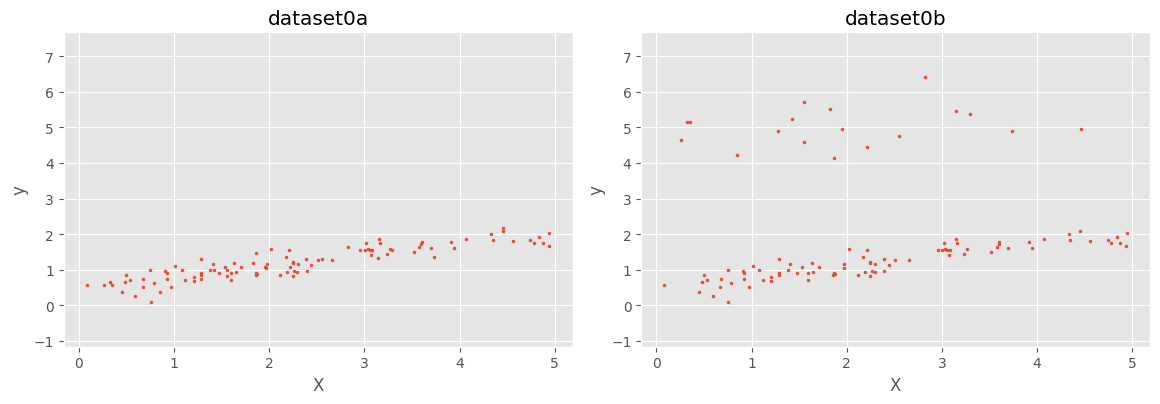

In [34]:
fig, axes = plt.subplots(ncols=2, figsize=(11.7, 8.3/2))
axes = axes.flatten()

min_y, max_y = np.min([y_0a, y_0b]), np.max([y_0a, y_0b])
span = max_y - min_y

axes[0].scatter(X_0a, y_0a, s=4)
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].set_title("dataset0a")

axes[1].scatter(X_0b, y_0b, s=4)
axes[1].set_xlabel("X")
axes[1].set_ylabel("y")
axes[1].set_title("dataset0b")

axes[0].set_ylim(min_y - 0.2*span, max_y + 0.2*span)
axes[1].set_ylim(min_y - 0.2*span, max_y + 0.2*span)

fig.tight_layout()

In [35]:
regressor_dict = {
    "huber": HuberRegressor(),
    #"svr": LinearSVR(),
    "linear": LinearRegression()
}

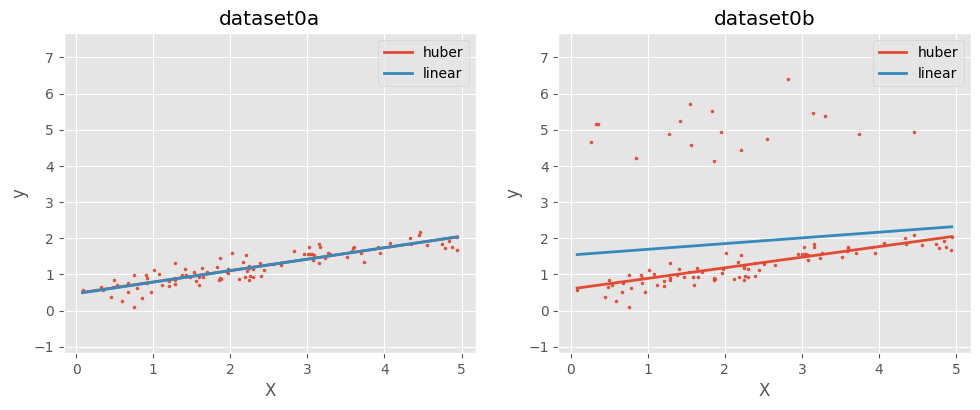

In [36]:
fig, axes = plt.subplots(ncols=2, figsize=(11.7, 8.3/2))

min_y, max_y = np.min([y_0a, y_0b]), np.max([y_0a, y_0b])
span = max_y - min_y

axes[0].scatter(X_0a, y_0a, s=4)
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].set_title("dataset0a")

axes[1].scatter(X_0b, y_0b, s=4)
axes[1].set_xlabel("X")
axes[1].set_ylabel("y")
axes[1].set_title("dataset0b")

for regressor_name, regressor in regressor_dict.items():
    regressor.fit(X_0a, y_0a)
    plot_predictions(X=X_0a, ax=axes[0], label=regressor_name, model=regressor)

    regressor.fit(X_0b, y_0b)
    plot_predictions(X=X_0b, ax=axes[1], label=regressor_name, model=regressor)

axes[0].set_ylim(min_y - 0.2*span, max_y + 0.2*span)
axes[1].set_ylim(min_y - 0.2*span, max_y + 0.2*span)

axes[0].legend()
axes[1].legend()

## dataset1

In [37]:
X_1a, y_1a = load_dataset_csv("robustregression_dataset1a.csv")
X_1b, y_1b = load_dataset_csv("robustregression_dataset1b.csv")

In [38]:
X_1a = X_1a.reshape(-1, 1)
X_1b = X_1b.reshape(-1, 1)

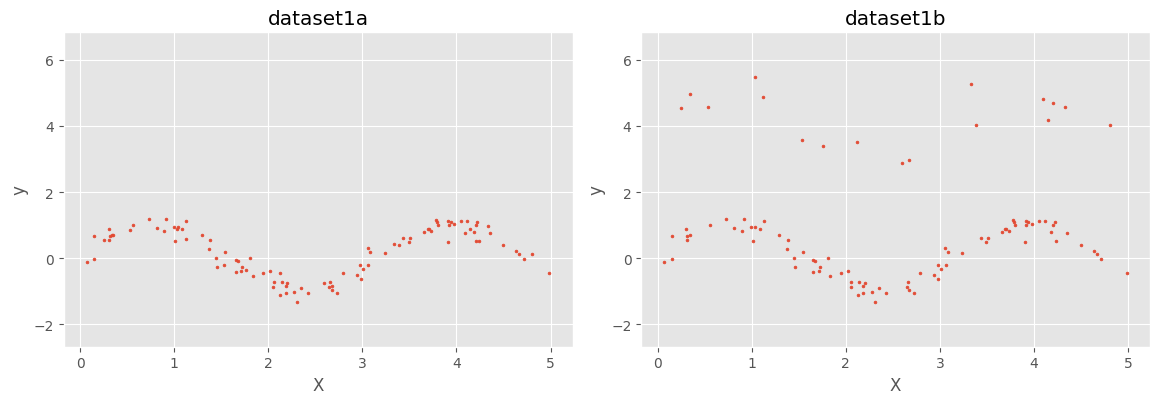

In [39]:
fig, axes = plt.subplots(ncols=2, figsize=(11.7, 8.3/2))

min_y, max_y = np.min([y_1a, y_1b]), np.max([y_1a, y_1b])
span = max_y - min_y

axes[0].scatter(X_1a, y_1a, s=4)
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].set_title("dataset1a")
axes[0].set_ylim(min_y - 0.2*span, max_y + 0.2*span)

axes[1].scatter(X_1b, y_1b, s=4)
axes[1].set_xlabel("X")
axes[1].set_ylabel("y")
axes[1].set_title("dataset1b")
axes[1].set_ylim(min_y - 0.2*span, max_y + 0.2*span)

fig.tight_layout()

In [43]:
regressor_dict = {
    "huber": HuberRegressor(fit_intercept=False, max_iter=10000),
    #"svr": LinearSVR(fit_intercept=False),
    "linear": LinearRegression(fit_intercept=False)
}

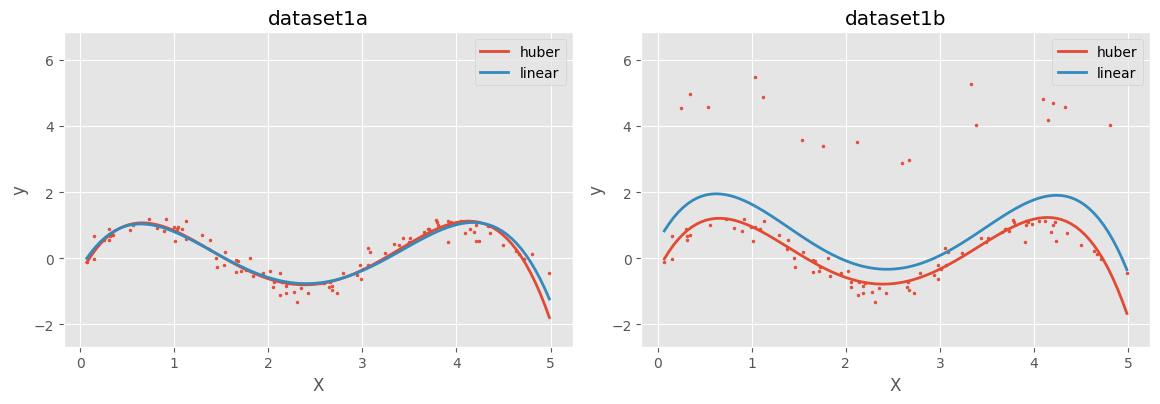

In [44]:
fig, axes = plt.subplots(ncols=2, figsize=(11.7, 8.3/2))

min_y, max_y = np.min([y_1a, y_1b]), np.max([y_1a, y_1b])
span = max_y - min_y

axes[0].scatter(X_1a, y_1a, s=4)
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].set_title("dataset1a")

axes[1].scatter(X_1b, y_1b, s=4)
axes[1].set_xlabel("X")
axes[1].set_ylabel("y")
axes[1].set_title("dataset1b")

deg_poly = 4

for regressor_name, regressor in regressor_dict.items():
    X_1a_poly = np.vander(X_1a[:, 0], N=deg_poly+1)
    X_1b_poly = np.vander(X_1b[:, 0], N=deg_poly+1)

    regressor.fit(X_1a_poly, y_1a)
    plot_predictions(X=X_1a, ax=axes[0], label=regressor_name, model=regressor, n=deg_poly)

    regressor.fit(X_1b_poly, y_1b)
    plot_predictions(X=X_1b, ax=axes[1], label=regressor_name, model=regressor, n=deg_poly)

axes[0].set_ylim(min_y - 0.2*span, max_y + 0.2*span)
axes[1].set_ylim(min_y - 0.2*span, max_y + 0.2*span)

axes[0].legend()
axes[1].legend()

fig.tight_layout()